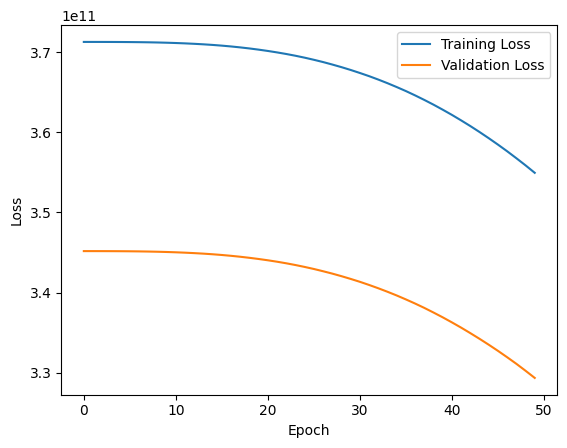

7/7 [==============================] - 0s 1ms/step


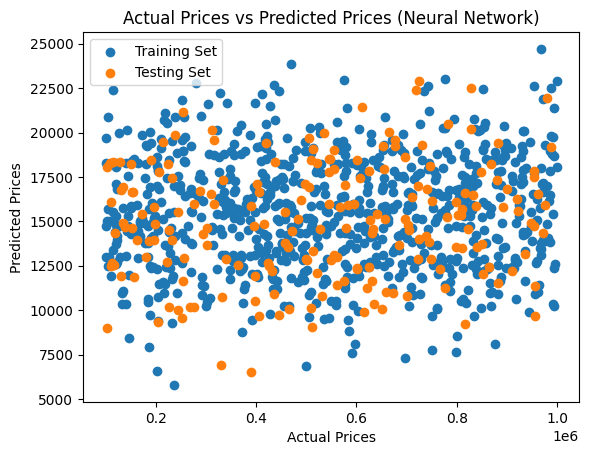

Training R^2: -4.33725756890611
Testing R^2: -4.102182567082598


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Collect Data
np.random.seed(42)

# Creating a synthetic dataset with 1000 samples
num_samples = 1000

data = {
    'Size': np.random.randint(1000, 5000, num_samples),
    'Bedrooms': np.random.randint(1, 6, num_samples),
    'Location': np.random.randint(1, 11, num_samples),
    'Bathrooms': np.random.randint(1, 4, num_samples),
    'YearBuilt': np.random.randint(1960, 2022, num_samples),
    'GarageSpaces': np.random.randint(0, 3, num_samples),
    'Price': np.random.randint(100000, 1000000, num_samples)
}

df = pd.DataFrame(data)

# Step 2: Preprocess Data
scaler = MinMaxScaler()
df[['Size', 'Bedrooms', 'Location', 'Bathrooms', 'YearBuilt', 'GarageSpaces']] = scaler.fit_transform(
    df[['Size', 'Bedrooms', 'Location', 'Bathrooms', 'YearBuilt', 'GarageSpaces']]
)

# Step 3: Neural Network Model
X = df[['Size', 'Bedrooms', 'Location', 'Bathrooms', 'YearBuilt', 'GarageSpaces']]
y = df['Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple neural network
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Step 4: Plot Training Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 5: Model Evaluation
predictions_train = model.predict(X_train).flatten()
predictions_test = model.predict(X_test).flatten()

# Scatter plot for training set
plt.scatter(y_train, predictions_train, label='Training Set')
# Scatter plot for testing set
plt.scatter(y_test, predictions_test, label='Testing Set')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices (Neural Network)')
plt.legend()
plt.show()

# Calculate R^2 for training set
r2_train = r2_score(y_train, predictions_train)
# Calculate R^2 for testing set
r2_test = r2_score(y_test, predictions_test)

print(f'Training R^2: {r2_train}')
print(f'Testing R^2: {r2_test}')